# Projekt 2, kamień milowy 3
### Sebastian Deręgowski, Bartosz Jamroży, Dawid Janus

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import operator

Ładujemy nasz zbiór danych po transformacji oraz zbiór danych z etykietami, zmieniając przy okazji te etykiety, tak aby wskazywały jedynie na księgę, a nie również na numer rozdziału:

In [2]:
df = pd.read_csv("data.csv")
labelled_df = pd.read_csv("AllBooks_baseline_DTM_Labelled.csv")

In [3]:
all_chapters=labelled_df["Unnamed: 0"].values
books=[]
for i,j in enumerate(all_chapters):
    books.append(j.split(sep="_")[0])
    
labelled_df['Unnamed: 0']=books

Wczytajmy także dwie funkcje z poprzedniego kamienia milowego:

In [4]:
def scatter(x, colors):
    palette = np.array(sns.color_palette("hls", 10))

    f = plt.figure(figsize=(16,16))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    ax.axis('off')
    # add labels
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txts.append(txt)

    return f, ax, sc, txts

In [5]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

def modeling(model,df):
    try:
        model.fit(df)
        y = model.predict(df)
    except:
        y = model.fit_predict(df)
    tsne_proj = TSNE(random_state=1500100900).fit_transform(df)
    scatter(tsne_proj, y)
    plt.show()

Zdefiniujmy również funkcję obliczającą skuteczność klastrowania przy użyciu wybranego przez nas algorytmu AgglomerativeClustering (używamy w tym celu `v_measure_score`):

In [6]:
from sklearn.metrics.cluster import v_measure_score
from sklearn.cluster import AgglomerativeClustering

def scoring_ac(df,n_clusters,labels):
        model = AgglomerativeClustering(linkage='ward',n_clusters=n_clusters)
        y = model.fit_predict(df)
        print(v_measure_score(labels,y))

Sprawdźmy jaką skuteczność otrzymamy przy próbie zgrupowania wszystkich rozdziałów w docelową liczbę ksiąg, czyli 8:

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


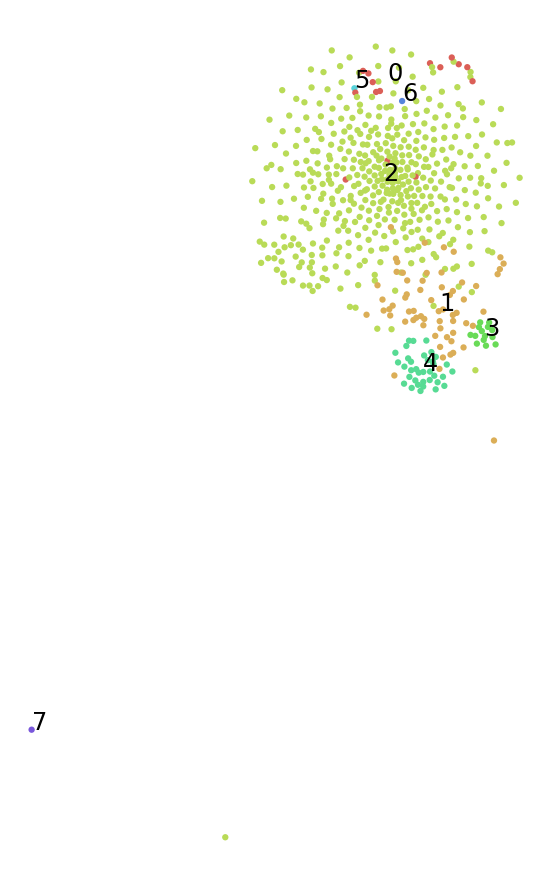

In [7]:
modeling(AgglomerativeClustering(linkage='ward',n_clusters=8),df)

In [8]:
scoring_ac(df,8,books)

0.44886830562526386


Nie jest ona powalająca. Podczas naszych prac nad projektem i różnych metod klasteryzacji z różnymi parametrami, zauważyliśmy powtarzającą się zależność - najbardziej naturalną liczbą klastrów jest 2. Stąd nasunęło nam się przypuszczenie, że 8 ksiąg możemy podzielić na dwie grupy, w obrębie których poszczególne księgi są niemal nierozróżnialne, natomiast obie grupy są ze sobą dość mało "spokrewnione".

Sprawdźmy zatem jak zadziała nasz model, jeśli uznamy, że księgi `'Buddhism','TaoTeChing','Upanishad','YogaSutra'` za jedną księgę, a pozostałe cztery za drugą:

In [9]:
books_2 = []
for i in range(len(books)):
    if books[i] in ('Buddhism','TaoTeChing','Upanishad','YogaSutra'):
        books_2.append(1)
    else:
        books_2.append(0)

In [10]:
scoring_ac(df,2,books_2)

0.9775760214008379


Otrzymaliśmy oszałamiającą skuteczność blisko 98%. Podobieństwo ksiąg w obrębie tych dwóch grup potwierdza poniższy wykres:

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


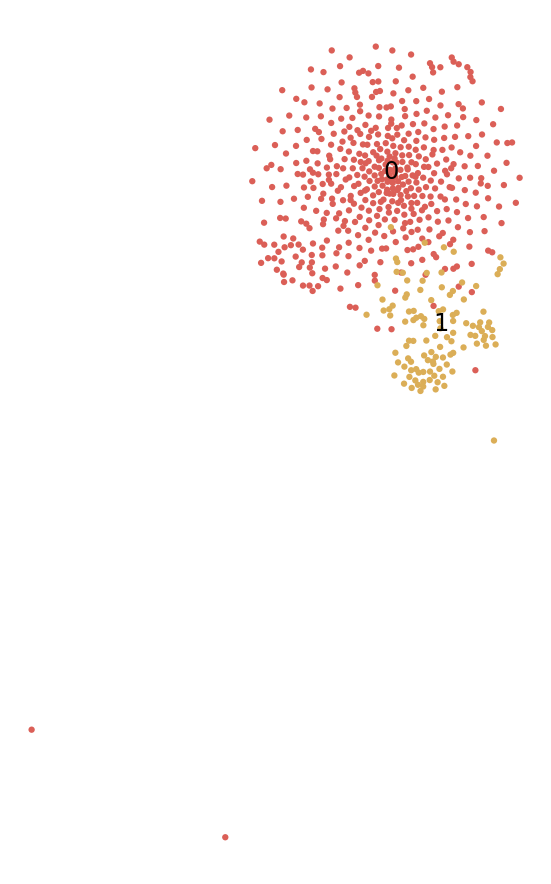

In [11]:
modeling(AgglomerativeClustering(linkage='ward',n_clusters=2),df)

Trudno sobie wyobrazić, że klaster 0 zawiera w sobie 4 księgi, jest to mocno klaster o skupieniu centralnym. Trudno byłoby gołym okiem wyodrębnić w nim 4 klastry. Z perspektywy naszego modelu wygląda to tak jakbyśmy mieli 8 ksiąg w dwóch różnych językach - bardzo łatwo i skutecznie możemy dokonać podziału na "języki", ale w obrębie danego "języka" niemal niemożliwe jest wyodrębnienie poszczególnych ksiąg.

Zważywszy jednak na to, że klaster 1 ma w odróżnieniu od klastra 0 dość niejednorodną budowę, spróbujmy dokonać klastrowania również w jego obrębie, tzn. takiego podziału, w którym księgi z klastra 0 pozostaną jednolite, natomiast księgi z klastru 1 spróbujemy wyodrębnić.

In [12]:
books_3 = []
for i in range(len(books)):
    if books[i] in ('Buddhism','TaoTeChing','Upanishad','YogaSutra'):
        books_3.append(0)
    elif books[i]=='BookOfProverb':
        books_3.append(1)
    elif books[i]=='BookOfEcclesiastes':
        books_3.append(2)
    elif books[i]=='BookOfEccleasiasticus':
        books_3.append(3)
    else:
        books_3.append(4)

In [13]:
scoring_ac(df,5,books_3)

0.7055260266806066


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


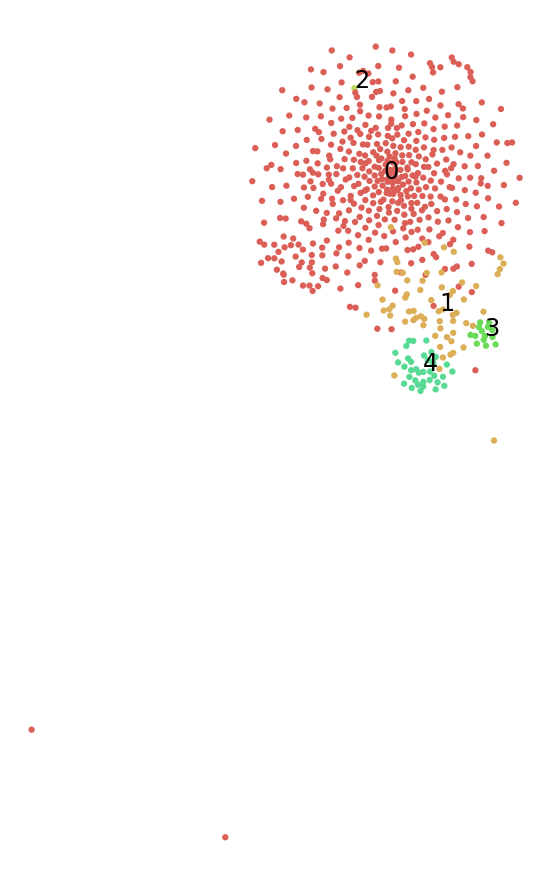

In [14]:
modeling(AgglomerativeClustering(linkage='ward',n_clusters=5),df)

Skuteczność jest dość wysoka i po wykresie wydaje się, że podział jest optymalny i może dać dobre rezultaty, ale weźmy poprawkę na to, że dość łatwym zadaniem było rozdzielenie klastra 0. Spróbujmy policzyć, jaka była skuteczność wyłącznie w obrębie ksiąg zgrupowanych poprzednio w klaster 1:

In [15]:
y = AgglomerativeClustering(linkage='ward',n_clusters=5).fit_predict(df)
print(v_measure_score(books_3[-112:],y[-112:]))

0.09043466684476005


Kolorowo już nie jest. Wynik ten potwierdza, że rozróżnienie ksiąg w obrębie tych dwóch grup jest niemal niemożliwym do osiągnięcia zadaniem.